In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = 15, 6
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/brettnaul/miniconda3/envs/deep/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [ ]:
%run period_inverse.py 64 2 0 --no_train --model_type conv --even --filter_length 3 --sim_type period_inverse/even/noise0 --lr 5e-4

train = np.arange(args.N_train); test = np.arange(args.N_test) + args.N_train
predict_conv = model.predict(Y[test])

In [ ]:
%run period_inverse.py 64 4 0 --no_train --model_type atrous --even --filter_length 5 --sim_type period_inverse/even --lr 3e-4

train = np.arange(args.N_train); test = np.arange(args.N_test) + args.N_train
predict_atrous = model.predict(Y[test])

In [ ]:
%run period_inverse.py 64 3 0 --no_train --model_type gru --even --sim_type period_inverse/even --lr 3e-4

train = np.arange(args.N_train); test = np.arange(args.N_test) + args.N_train
predict_gru = model.predict(Y[test])

In [ ]:
i = -1

In [ ]:
i += 1
if args.even:
    t = np.linspace(0, 2 * np.pi, args.n_max)
    x = X[test[i]].ravel()
else:
    t = X[test[i], :, 0].cumsum()
    x = X[test[i], :, 1]
plt.plot(t, x, 'o')

#plt.plot(t, predict_gru[i], '--')
plt.plot(t, predict_conv[i], '--')
#plt.plot(t, predict_atrous[i], '--')

#plt.legend(['Original', 'GRU', 'Conv', 'Atrous'])

Using TensorFlow backend.


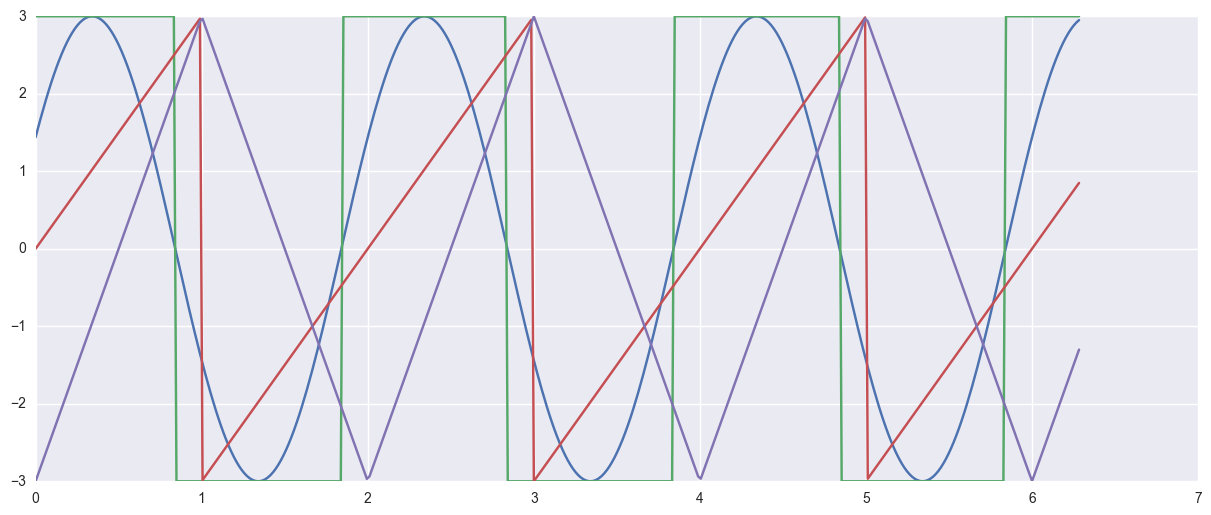

In [2]:
from sample_data import _sinusoid, _square, _sawtooth, _triangular

t = np.linspace(0, 2 * np.pi, 401)
w = 0.5; A = 3; phi = 0.5; b = 0.
plt.plot(t, _sinusoid(w, A, phi, b)(t))
plt.plot(t, _square(w, A, phi, b)(t))
plt.plot(t, _sawtooth(w, A, phi, b)(t))
plt.plot(t, _triangular(w, A, phi, b)(t))

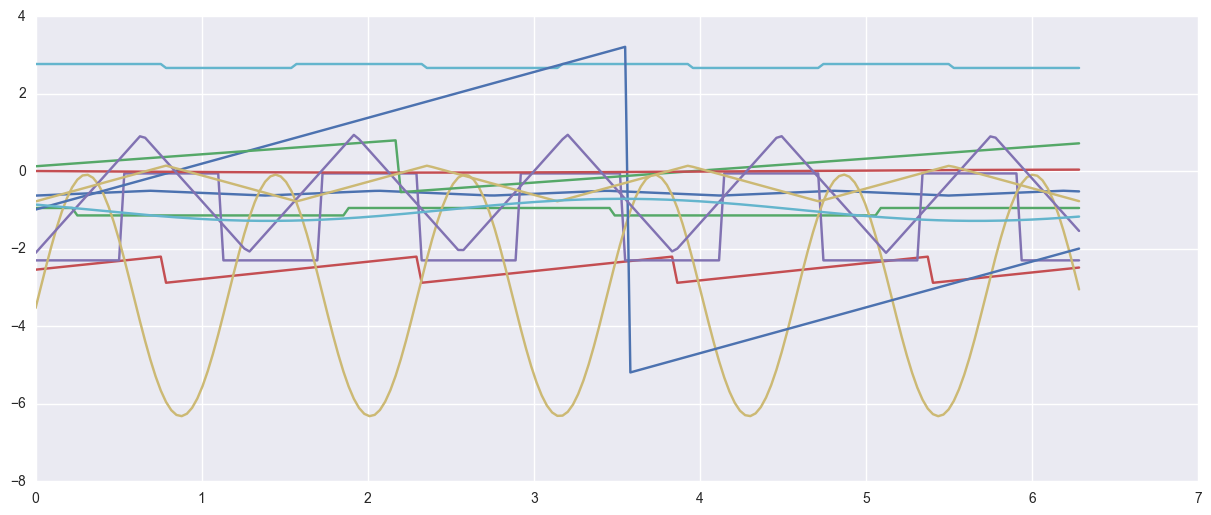

In [45]:
from sample_data import periodic

n_min = 201; n_max = n_min
N = 12
X, Y, X_raw, labels = periodic(N, n_min, n_max, even=True, kind='mixed')
for i in range(N):
    t = X[i, :, 0]
    m = X[i, :, 1]
    plt.plot(t, m)